# Geopandas basics

Geopandas is a library that extends the Pandas library to work with geospatial data. It is built on top of the Shapely library for geometric operations. It is also built on top of the Fiona library for file access. Geopandas is great for working with **vector** data.

In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point, Polygon

<Axes: >

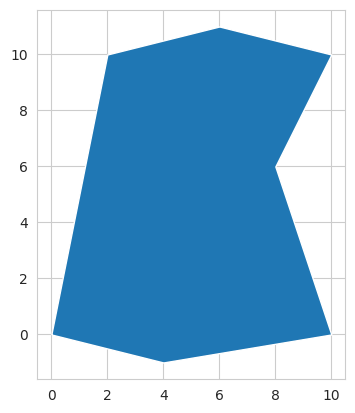

In [53]:
# polygon from boundaries
boundaries = Polygon([(0, 0), (2, 10), (6, 11), (10, 10), (8, 6), (10, 0), (4, -1)])
# create a GeoDataFrame
boundaries_gdf = gpd.GeoDataFrame(geometry=[boundaries])
boundaries_gdf.plot()

<Axes: >

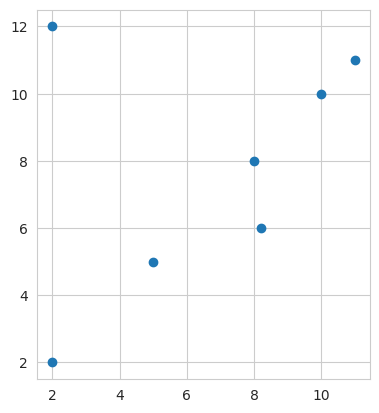

In [3]:
# some points
point1 = Point(2, 2)
point2 = Point(8, 8)
point3 = Point(5, 5)
point4 = Point(2, 12)
point5 = Point(10, 10)
point6 = Point(11, 11)
point7 = Point(8.2, 6)
# create a GeoDataFrame
points_gdf = gpd.GeoDataFrame(geometry=[point1, point2, point3, point4, point5, point6, point7])
# add the name of the points
points_gdf['name'] = ['point1', 'point2', 'point3', 'point4', 'point5', 'point6', 'point7']
points_gdf.plot()

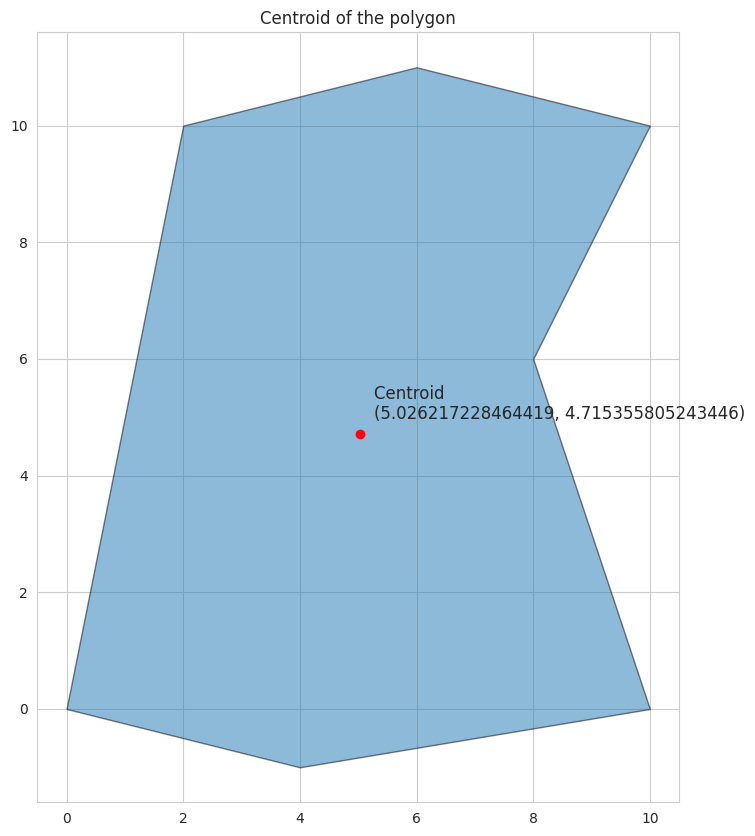

In [5]:
# plot the centroid of the polygon
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
boundaries_gdf.centroid.plot(
    ax=ax,
    color='red'
)
# display the coordinates of the centroid
x, y = boundaries.centroid.x, boundaries.centroid.y
ax.text(x + .25, y + .25, f'Centroid \n({x}, {y})', fontsize=12)
# add a title
plt.title('Centroid of the polygon')
plt.show()

In [6]:
# show the area of the polygon
print(f'The area of the polygon is {boundaries.area} units')
# show it perimeter
print(f'The perimeter of the polygon is {boundaries.length} units')

The area of the polygon is 89.0 units
The perimeter of the polygon is 39.44680970967311 units


In [7]:
# let's see how to interact with points
# are there some points inside the polygon?
points_gdf.within(boundaries).sum()

3

In [8]:
# Maybe we can join the points that are within the polygon
gpd.sjoin(points_gdf, boundaries_gdf, predicate='within')

,geometry,name,index_right
0,POINT (2.00000 2.00000),point1,0
1,POINT (8.00000 8.00000),point2,0
2,POINT (5.00000 5.00000),point3,0


In [9]:
# Or maybe just get the points that are inside the polygon
gpd.overlay(points_gdf, boundaries_gdf, how='intersection')

,name,geometry
0,point1,POINT (2.00000 2.00000)
1,point2,POINT (8.00000 8.00000)
2,point3,POINT (5.00000 5.00000)
3,point5,POINT (10.00000 10.00000)


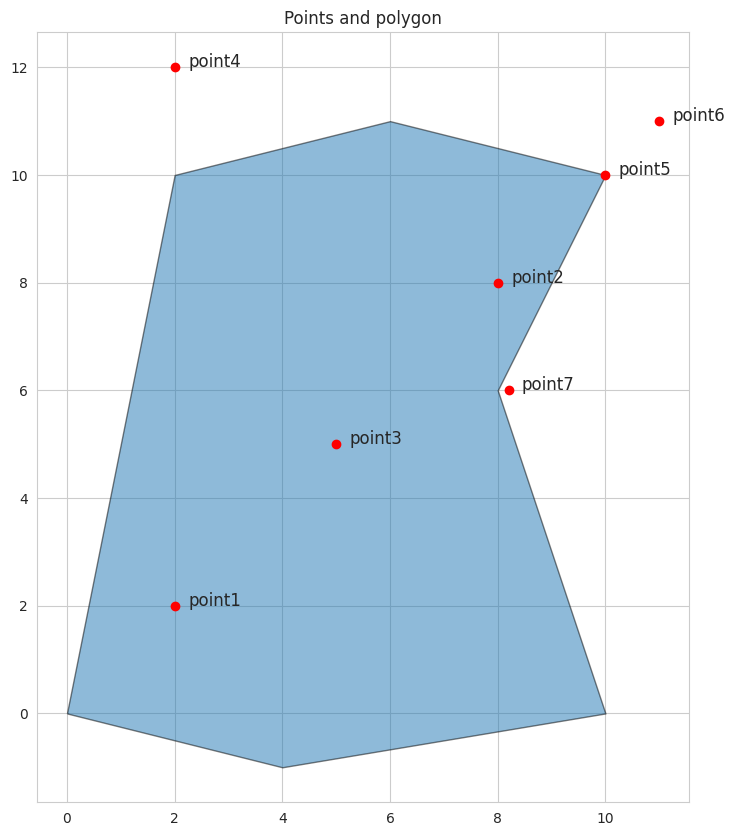

In [10]:
# Uh, that's not the same result
# Let's check why !
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
points_gdf.plot(
    ax=ax,
    color='red'
)
# Add the name of the points
for x, y, name in zip(points_gdf.geometry.x, points_gdf.geometry.y, points_gdf['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Points and polygon')
plt.show()

In [11]:
# It seems that the point5 is on the edge of the polygon

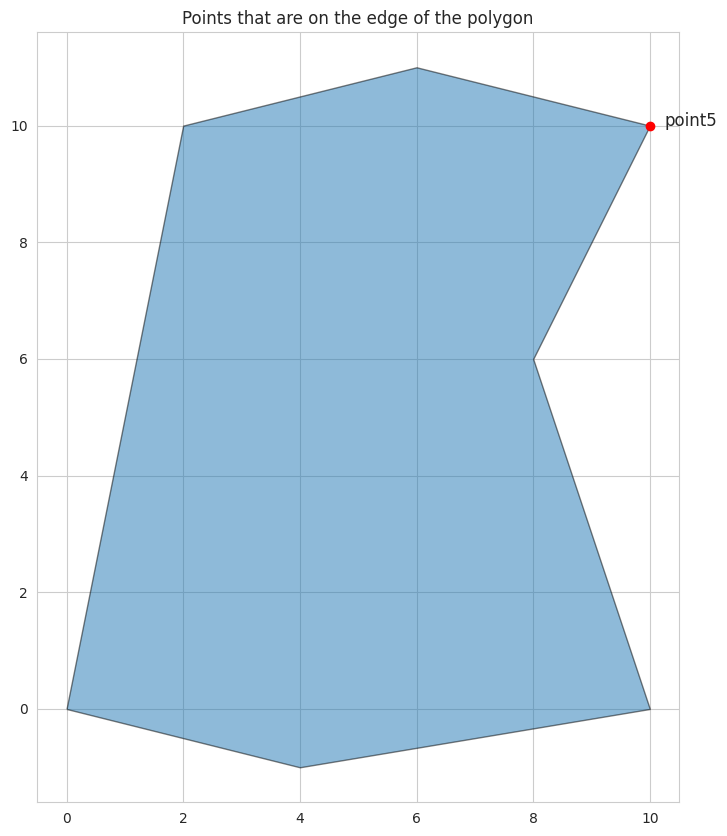

In [12]:
# show points that are on the edge of the polygon
mask = points_gdf.touches(boundaries)
touches = points_gdf[mask]
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
touches.plot(
    ax=ax,
    color='red'
)
# Add the name of the points
for x, y, name in zip(touches.geometry.x, touches.geometry.y, touches['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Points that are on the edge of the polygon')
plt.show()

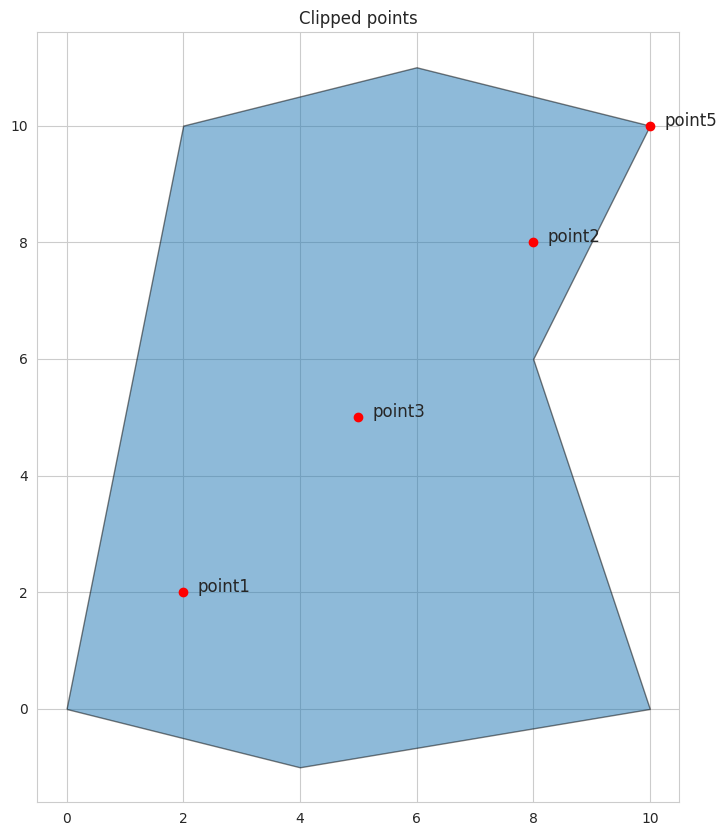

In [13]:
# What about clip ?
clipped = gpd.clip(points_gdf, boundaries_gdf)

fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
clipped.plot(
    ax=ax,
    color='red'
)
# Add the name of the points
for x, y, name in zip(clipped.geometry.x, clipped.geometry.y, clipped['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Clipped points')
plt.show()

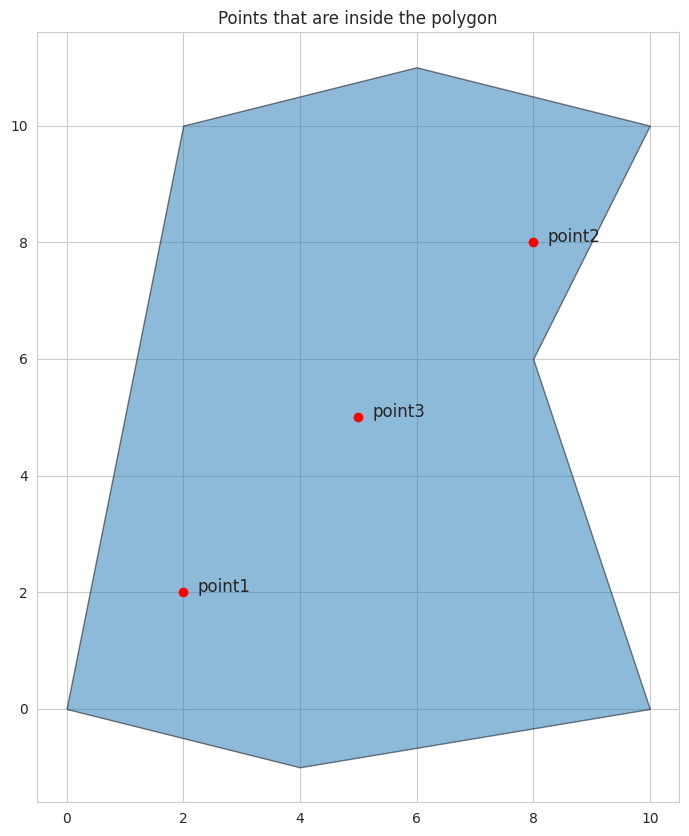

In [14]:
# points that are inside the polygon
mask = points_gdf.within(boundaries)
inside = points_gdf[mask]
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
inside.plot(
    ax=ax,
    color='red'
)
# Add the name of the points
for x, y, name in zip(inside.geometry.x, inside.geometry.y, inside['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Points that are inside the polygon')
plt.show()

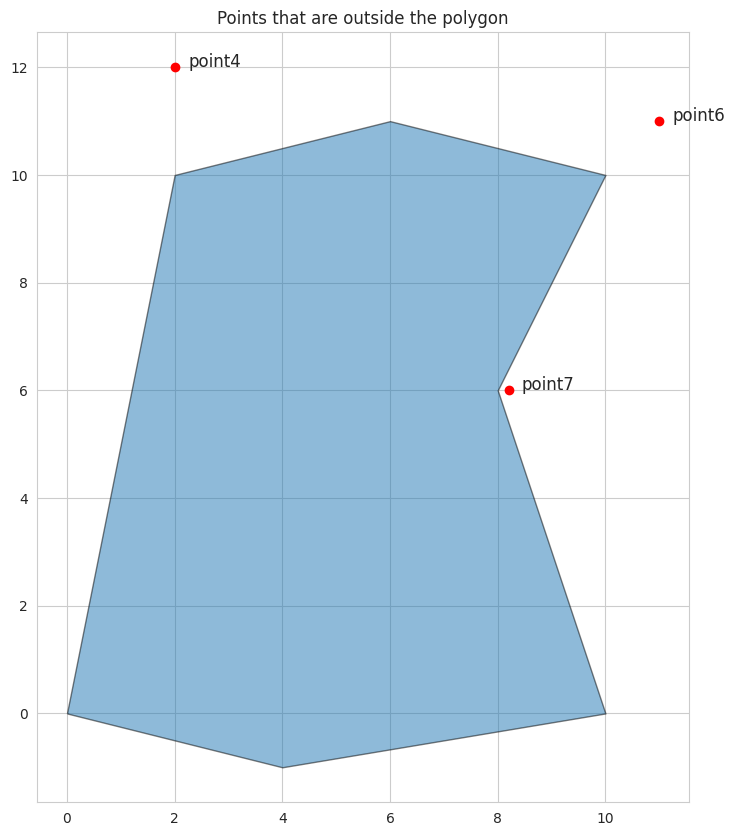

In [15]:
# what about those that are outside the polygon
mask = points_gdf.disjoint(boundaries)
outside = points_gdf[mask]
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
outside.plot(
    ax=ax,
    color='red'
)
# Add the name of the points
for x, y, name in zip(outside.geometry.x, outside.geometry.y, outside['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Points that are outside the polygon')
plt.show()

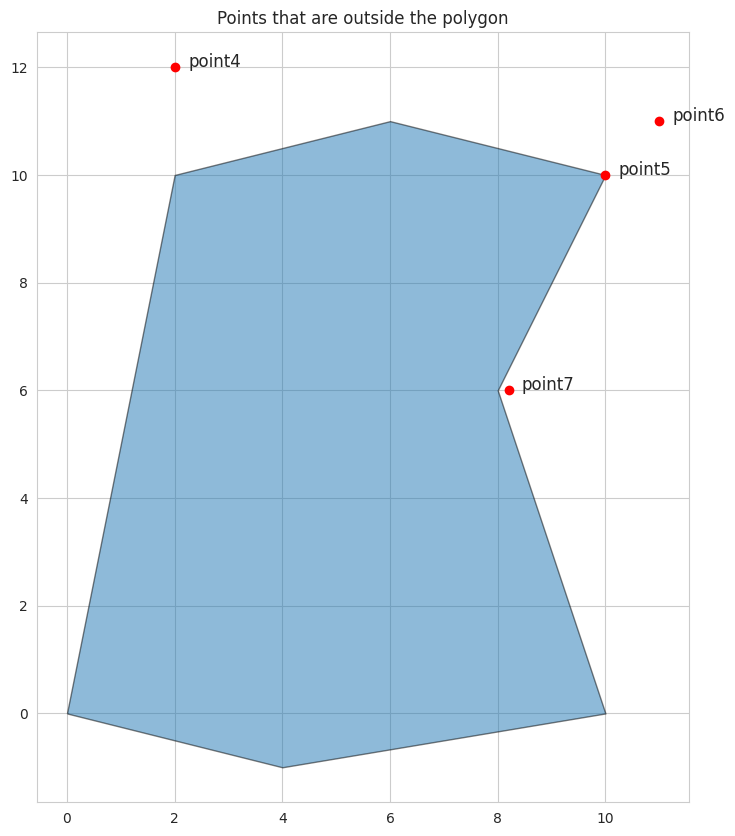

In [16]:
# what about the points that are NOT within the polygon
mask = ~points_gdf.within(boundaries)
outside = points_gdf[mask]
fig, ax = plt.subplots(figsize=(10, 10))
boundaries_gdf.plot(
    edgecolor='black',
    alpha=0.5,
    ax=ax
)
outside.plot(
    ax=ax,
    color='red'
)
# Add the name of the points
for x, y, name in zip(outside.geometry.x, outside.geometry.y, outside['name']):
    ax.text(x + .25, y, name, fontsize=12)
plt.title('Points that are outside the polygon')
plt.show()

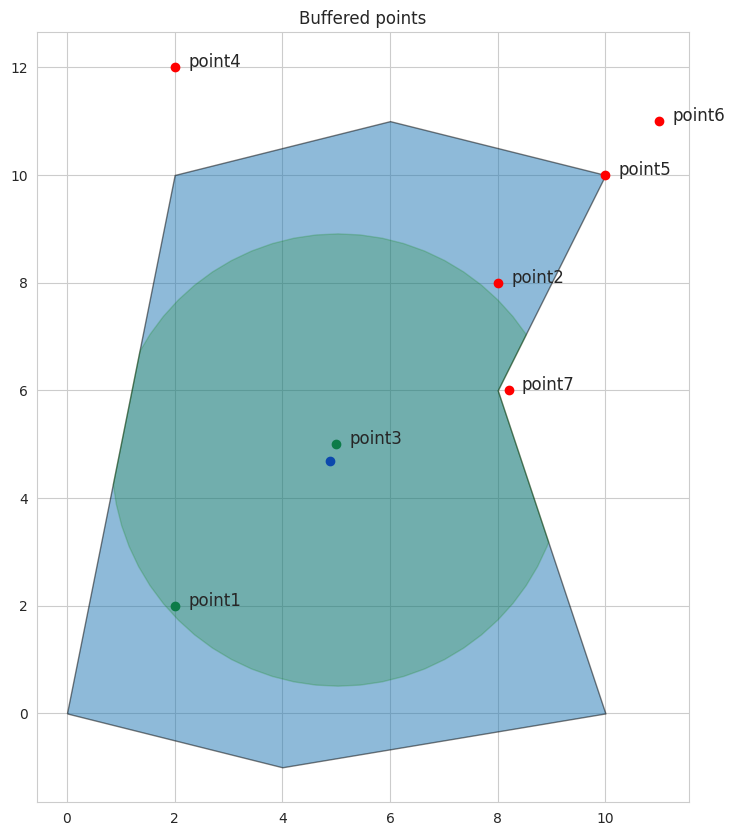

In [56]:
# Get the points that are inside the polygon and a buffer of the centroid of the polygon
# Create a buffer of the centroid of the polygon
buffered = boundaries.centroid.buffer(4.2)
# Clip the boundaries with the buffer of the boundaries' centroid
clipped = gpd.clip(boundaries_gdf, buffered)
# And then clip the points with the clipped boundaries
buffered_points = gpd.clip(points_gdf, clipped)
not_buffered_points = points_gdf[~points_gdf.within(clipped.unary_union)]

fig, ax = plt.subplots(figsize=(10, 10))
# plot the centroid of the polygon
clipped.centroid.plot(
    ax=ax,
    color='blue'
)
buffered_points.plot(
    ax=ax,
    color='green'
)
# plot the boundaries
boundaries_gdf.plot(
    ax=ax,
    edgecolor='black',
    alpha=0.5
)
# plot point that are not in the buffer
not_buffered_points.plot(
    ax=ax,
    color='red'
)
clipped.plot(
    color='green',
    edgecolor='green',
    alpha=0.2,
    ax=ax
)
# annotate the points
for x, y, name in zip(points_gdf.geometry.x, points_gdf.geometry.y, points_gdf['name']):
    ax.text(x + .25, y, name, fontsize=12)
    
plt.title('Buffered points')
plt.show()